In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline,make_pipeline
#from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from datetime import timedelta
from datetime import timezone

In [2]:
airline      = pd.read_csv('airline.csv')
day_schedule = pd.read_csv('day_schedule.csv')
group        = pd.read_csv('group.csv')
order        = pd.read_csv('order.csv')
training     = pd.read_csv('training-set.csv')
testing     = pd.read_csv('testing-set.csv')

In [3]:
training['order_id'] = training['order_id'].astype(str)     # 轉成字串才能 merge
order['order_id'] = order['order_id'].astype(str)
train = pd.merge(order, training, on='order_id', how='inner') 
test  = pd.merge(order, testing, on='order_id', how='inner') 
test['deal_or_not'] = test[' deal_or_not']
test.drop([' deal_or_not'], inplace= True, axis = 1)
data  = pd.concat([train,test])
data  = pd.merge(data, group, on = 'group_id', how = 'left')

In [4]:
train = data[data['deal_or_not'].notnull()]
test  = data[data['deal_or_not'].isnull()]

In [5]:
len(train), len(test)

(297020, 99895)

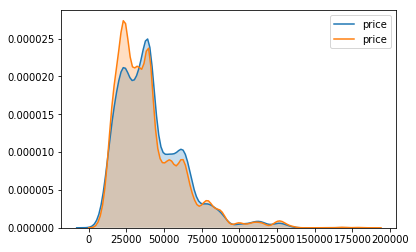

In [6]:
sns.kdeplot(train.loc[train['deal_or_not'] == 1, 'price'], shade = True)
sns.kdeplot(train.loc[train['deal_or_not'] == 0, 'price'], shade = True)

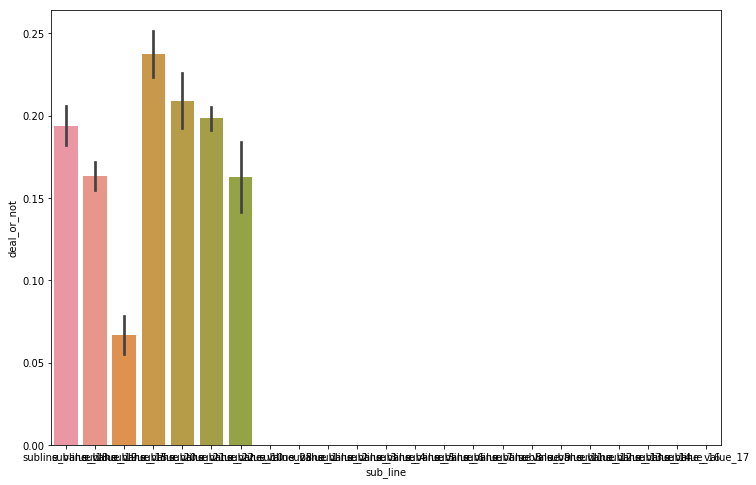

In [7]:
plt.figure(figsize=(12,8))
g = sns.barplot(x = 'sub_line', y = 'deal_or_not', data = data)

source_1
1    0.180452
2    0.223532
3    0.351651
Name: deal_or_not, dtype: float64

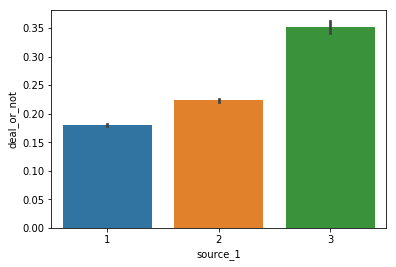

In [8]:
#source1、source2 轉成數字
source1_map ={
    'src1_value_1' : 1,
    'src1_value_2' : 2,
    'src1_value_3' : 3,
}
source2_map ={
    'src2_value_1' : 1,
    'src2_value_2' : 2,
    'src2_value_3' : 3,
    'src2_value_4' : 4,
}
data.source_1 = data.source_1.map(source1_map)
data.source_2 = data.source_2.map(source2_map)
sns.barplot(data = data, x = 'source_1', y = 'deal_or_not')
data.groupby(['source_1'])['deal_or_not'].mean()

source_2
1    0.191178
2    0.278989
3    0.178664
4    0.293603
Name: deal_or_not, dtype: float64

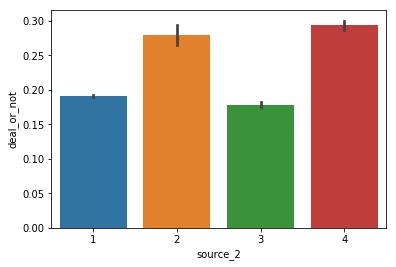

In [9]:
sns.barplot(data = data, x = 'source_2', y = 'deal_or_not')
data.groupby(['source_2'])['deal_or_not'].mean()

people_amount
1     0.196556
2     0.192653
3     0.204056
4     0.207737
5     0.197572
6     0.184158
7     0.231230
8     0.219486
9     0.252236
10    0.194321
11    0.290557
12    0.247162
13    0.309339
14    0.285714
15    0.135294
16    0.129268
17    0.151869
18    0.261981
19    0.133956
20    0.068020
21    0.285714
22    0.352381
23    0.173469
24    0.122549
25    0.076364
26    0.196970
27    0.056497
28    0.140351
29    0.060606
30    0.117647
31    0.050505
32    0.212121
33    0.190476
34    0.057143
35    0.107143
36    0.214286
37    0.000000
38    0.285714
39    0.083333
40    0.000000
41    0.100000
42    0.000000
45         NaN
46    0.000000
47    1.000000
50    0.000000
Name: deal_or_not, dtype: float64

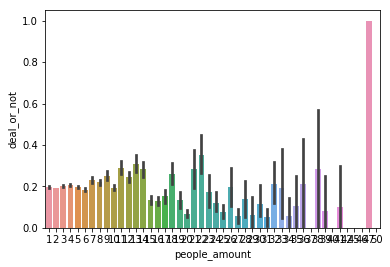

In [10]:
sns.barplot(data = data, x = 'people_amount', y = 'deal_or_not')
data.groupby(['people_amount'])['deal_or_not'].mean()

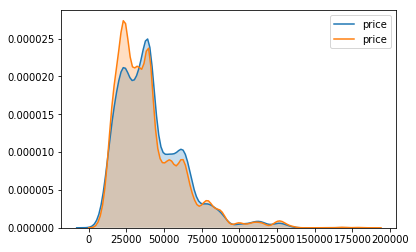

In [11]:
sns.kdeplot(train.loc[train['deal_or_not'] == 1, 'price'], shade = True)
sns.kdeplot(train.loc[train['deal_or_not'] == 0, 'price'], shade = True)

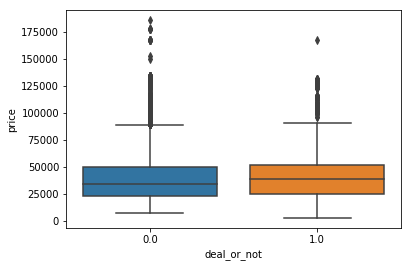

In [12]:
sns.boxplot(data= data, x ='deal_or_not', y = 'price')

In [13]:
train.sub_line.unique(),test.sub_line.unique()

(array([nan, 'subline_value_18', 'subline_value_19', 'subline_value_15',
        'subline_value_20', 'subline_value_21', 'subline_value_22',
        'subline_value_10', 'subline_value_23'], dtype=object),
 array(['subline_value_1', 'subline_value_2', 'subline_value_3',
        'subline_value_4', 'subline_value_5', 'subline_value_6',
        'subline_value_7', 'subline_value_8', 'subline_value_9',
        'subline_value_10', 'subline_value_11', 'subline_value_12',
        'subline_value_13', 'subline_value_14', 'subline_value_15',
        'subline_value_16', 'subline_value_18', 'subline_value_17',
        'subline_value_19', 'subline_value_20', 'subline_value_21',
        'subline_value_22', 'subline_value_23'], dtype=object))

days
2.0     1.000000
3.0     0.226415
4.0     0.140127
5.0     0.154165
6.0     0.196521
7.0     0.149913
8.0     0.224322
9.0     0.194925
10.0    0.212251
11.0    0.198169
12.0    0.225610
13.0    0.126866
14.0    0.166667
15.0         NaN
16.0    0.000000
17.0    0.000000
Name: deal_or_not, dtype: float64

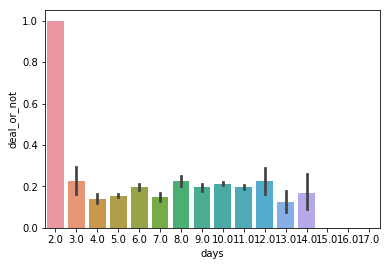

In [14]:
sns.barplot(data = data, x = 'days', y = 'deal_or_not')
data.groupby(['days'])['deal_or_not'].mean()

In [15]:
data.days.unique()

array([nan,  6.,  5.,  7.,  4.,  3.,  9.,  2., 10., 11.,  8., 13., 12.,
       14., 16., 17., 15.])

In [16]:
data[data.days == 15.0]

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,deal_or_not,sub_line,area,days,begin_date,price,product_name,promotion_prog
316139,9addf6b30f4a41ad62dc21aa923cd270,5f005fb147a0ec67a0b8afc2f9d26351,25-May-18,1,1,unit_value_21,4,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...
316140,b95e2a666de094b8121c2e69c1c95aeb,5f005fb147a0ec67a0b8afc2f9d26351,27-Apr-18,1,1,unit_value_37,2,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...
316141,d6abf5bb120b03189938a57161ef451e,5f005fb147a0ec67a0b8afc2f9d26351,5-May-18,1,1,unit_value_11,2,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...
316142,25e061a2610e9967f76fa3b55fab78ce,5f005fb147a0ec67a0b8afc2f9d26351,5-May-18,1,1,unit_value_28,1,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...
316143,03e77cf6b207a40b8f3b68160f0c57f2,5f005fb147a0ec67a0b8afc2f9d26351,20-Jul-18,2,1,unit_value_104,2,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...
316144,7c14dcaba6a5cb84d99ce9b9dfd09253,5f005fb147a0ec67a0b8afc2f9d26351,27-Mar-18,1,1,unit_value_21,6,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...
316145,8136b517db092af1a416c3e14a455a90,5f005fb147a0ec67a0b8afc2f9d26351,1-Aug-18,2,3,unit_value_6,2,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...
316146,63c9d91c2ea619609a4aaf4c112d388f,5f005fb147a0ec67a0b8afc2f9d26351,9-Jul-18,1,1,unit_value_17,1,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...
316147,950fa59e8b5e073bb8a16f79a3a782f4,5f005fb147a0ec67a0b8afc2f9d26351,13-Mar-18,1,1,unit_value_39,2,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...
316148,a4ab63ebac16e037751d1b7f6daf0fc2,5f005fb147a0ec67a0b8afc2f9d26351,9-Apr-18,2,1,unit_value_53,1,NaN,subline_value_5,area_value_39,15.0,25-Aug-18,82900.0,《現省一萬》大疆南北走一回～喀納斯、禾木、那拉提、帕米爾高原、卡拉庫裏湖精華全覽15日,&lt;b&gt;[GG]★【玩樂3‧6‧9 】[//][BB]玩樂3‧6‧9全年享折扣！愈...


In [17]:
train.head()

,order_id,group_id,order_date,source_1,source_2,unit,people_amount,deal_or_not,sub_line,area,days,begin_date,price,product_name,promotion_prog
0,136100,63695,5-Jan-17,src1_value_1,src2_value_1,unit_value_1,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,140370,63695,9-Nov-16,src1_value_1,src2_value_1,unit_value_2,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,211009,63695,20-Jan-17,src1_value_1,src2_value_1,unit_value_3,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41571,53481,14-Mar-17,src1_value_1,src2_value_1,unit_value_4,4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64125,53481,27-Mar-17,src1_value_2,src2_value_1,unit_value_5,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
order.keys()

Index(['order_id', 'group_id', 'order_date', 'source_1', 'source_2', 'unit',
       'people_amount'],
      dtype='object')

In [19]:
data.groupby(['unit'])['deal_or_not'].mean()

unit
unit_value_1      0.199837
unit_value_10     0.224652
unit_value_100    0.612310
unit_value_101    0.000000
unit_value_102    0.163522
unit_value_103    0.219512
unit_value_104    0.551687
unit_value_105    0.258621
unit_value_106    0.000000
unit_value_107    0.930275
unit_value_108    0.055556
unit_value_109    0.000000
unit_value_11     0.183346
unit_value_110    1.000000
unit_value_111    0.128205
unit_value_112    0.000000
unit_value_113    0.000000
unit_value_114    0.000000
unit_value_115    0.913907
unit_value_116    0.000000
unit_value_117    0.000000
unit_value_118    0.000000
unit_value_119    0.000000
unit_value_12     0.172185
unit_value_120    0.000000
unit_value_121    0.000000
unit_value_122         NaN
unit_value_123         NaN
unit_value_124         NaN
unit_value_125         NaN
                    ...   
unit_value_72     0.191439
unit_value_73     0.170391
unit_value_74     0.205151
unit_value_75     0.195506
unit_value_76     0.200922
unit_value_77     0.929

In [20]:
len(data.unit.unique()),len(train.unit.unique()),len(test.unit.unique())

(130, 121, 124)

In [21]:
order.keys()

Index(['order_id', 'group_id', 'order_date', 'source_1', 'source_2', 'unit',
       'people_amount'],
      dtype='object')

In [22]:
for i in data.keys():
    print(i, data[i].notnull().values.all())   #判斷是否有無缺失值

order_id True
group_id True
order_date True
source_1 True
source_2 True
unit True
people_amount True
deal_or_not False
sub_line False
area False
days False
begin_date False
price False
product_name False
promotion_prog False


In [23]:
airline.head()

,group_id,go_back,fly_time,src_airport,arrive_time,dst_airport
0,63695,去程,2017/3/22 23:30,TPE 桃園機場,2017/3/22 14:15,HNL 檀香山機場
1,63695,回程,2017/4/1 14:30,LAX 洛杉機機場,2017/4/2 21:00,TPE 桃園機場
2,53481,去程,2017/5/17 23:00,TPE 桃園機場,2017/5/17 14:45,HNL 檀香山機場
3,53481,回程,2017/5/27 16:00,LAX 洛杉機機場,2017/5/28 21:05,TPE 桃園機場
4,54305,去程,2017/6/21 23:30,TPE 桃園機場,2017/6/21 14:15,HNL 檀香山機場


In [24]:
airline_group = airline.groupby(['group_id']).sum()

In [25]:
airline_group.go_back.unique()

array(['去程回程', '去程去程回程回程', '去程去程回程', '去程去程去程回程回程回程', '去程去程', '回程去程',
       '去程回程回程', '去程去程去程回程回程', '去程去程去程去程', '去程去程去程回程', '去程去程回程回程去程回程',
       '去程去程回程回程回程', '去程去程去程去程回程回程', '去程去程去程回程回程回程回程', '去程回程去程回程', '去程',
       '去程回程去程去程回程回程', '去程去程去程去程回程回程回程回程', '回程', '去程去程去程去程去程回程回程回程',
       '去程去程去程回程回程去程'], dtype=object)

In [26]:
Go_Transfer_map = {
    '去程回程' : 0,
    '去程去程回程回程' : 1,
    '去程去程去程回程回程回程' : 2, 
    '去程回程回程' : 0,
    '去程去程' : 0, 
    '去程去程回程' : 1,
    '去程去程去程去程' : 1,
    '去程去程去程回程回程' : 2,
    '去程去程回程回程回程' : 1,
    '回程去程' : 0,
    '去程去程去程回程' : 1,
    '去程去程回程回程去程回程': 1,
    '去程去程去程回程回程回程回程' : 2,
    '去程回程去程回程' : 1,
    '去程' : 1,
    '去程回程去程去程回程回程': 1,
    '去程去程去程去程回程回程': 3,
    '去程去程去程去程回程回程回程回程' : 3,
    '回程' : 0, 
    '去程去程去程去程去程回程回程回程' : 4,
    '去程去程去程回程回程去程' : 3
    
}
Back_Transfer_map = {
    '去程回程' : 0,
    '去程去程回程回程' : 1,
    '去程去程去程回程回程回程' : 2, 
    '去程回程回程' : 1,
    '去程去程' : 0, 
    '去程去程回程' : 0,
    '去程去程去程去程' : 1,
    '去程去程去程回程回程' : 1,
    '去程去程回程回程回程' : 2,
    '回程去程' : 0,
    '去程去程去程回程' : 1,
    '去程去程回程回程去程回程': 1,
    '去程去程去程回程回程回程回程' : 3,
    '去程回程去程回程' : 1,
    '去程' : 1,
    '去程回程去程去程回程回程': 1,
    '去程去程去程去程回程回程' : 1,
    '去程去程去程去程回程回程回程回程' : 3,
    '回程' : 0, 
    '去程去程去程去程去程回程回程回程' : 2,
    '去程去程去程回程回程去程' : 1 
}

In [27]:
airline_group['Go_Transfer_map'] = airline_group['go_back'].map(Go_Transfer_map)
airline_group['Back_Transfer_map'] = airline_group['go_back'].map(Back_Transfer_map)
airline_group['Transfer_Sum'] = airline_group['Go_Transfer_map'] + airline_group['Back_Transfer_map']

In [28]:
airline_group.reset_index(level=0, inplace=True)

In [29]:
airline_group = airline_group[['group_id','Go_Transfer_map', 'Back_Transfer_map', 'Transfer_Sum']]

In [30]:
airline_group['group_id'] = airline_group['group_id'].astype('str')

In [31]:
data = pd.merge(data, airline_group, on = 'group_id', how = 'left')

Go_Transfer_map
0.0    0.182734
1.0    0.195062
2.0    0.202674
3.0         NaN
Name: deal_or_not, dtype: float64

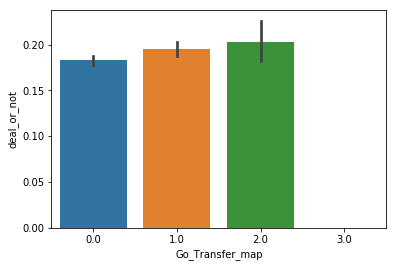

In [32]:
sns.barplot(data = data, x = 'Go_Transfer_map', y = 'deal_or_not')
data.groupby(['Go_Transfer_map'])['deal_or_not'].mean()

Back_Transfer_map
0.0    0.182568
1.0    0.195945
2.0    0.200139
3.0    0.000000
Name: deal_or_not, dtype: float64

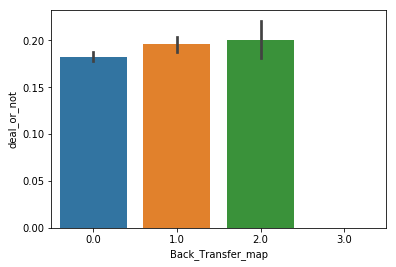

In [33]:
sns.barplot(data = data, x = 'Back_Transfer_map', y = 'deal_or_not')
data.groupby(['Back_Transfer_map'])['deal_or_not'].mean()

Go_Transfer_map
0.0    0.182734
1.0    0.195062
2.0    0.202674
3.0         NaN
Name: deal_or_not, dtype: float64

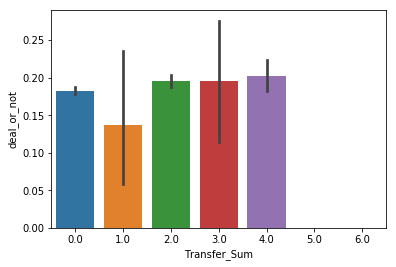

In [34]:
sns.barplot(data = data, x = 'Transfer_Sum', y = 'deal_or_not')
data.groupby(['Go_Transfer_map'])['deal_or_not'].mean()

In [35]:
data.keys()

Index(['order_id', 'group_id', 'order_date', 'source_1', 'source_2', 'unit',
       'people_amount', 'deal_or_not', 'sub_line', 'area', 'days',
       'begin_date', 'price', 'product_name', 'promotion_prog',
       'Go_Transfer_map', 'Back_Transfer_map', 'Transfer_Sum'],
      dtype='object')

In [36]:
data[['order_id','group_id','Go_Transfer_map']]

,order_id,group_id,Go_Transfer_map
0,136100,63695,NaN
1,140370,63695,NaN
2,211009,63695,NaN
3,41571,53481,NaN
4,64125,53481,NaN
5,76131,53481,NaN
6,238671,53481,NaN
7,5045,54305,NaN
8,37230,54305,NaN
9,138976,54305,NaN
